In [2]:
from pyrovskite.perovskite import Perovskite

### The Perovskite class has several helpful features for quick visualization of relevant geometric properties of the given perovskite system including:
1. Partial radial distribution functions
2. B-X/Bp-X Bond distance distributions
3. B-X-B/X-B-X bond angle distributions
----
### 1. Partial radial distribution functions
- These have numerous options which are mostly self-explanatory by the name. These can be plotted directly from the ase.geometry module, or in a nearly identical fashion (which appears to be avoid an error in the pure ase implementation) which smooths the spectra of interatomic distances with a gaussian kernel.

Let's use mapbi3 to demonstrate some of these things. Pure defaults correspond to
- Our smoothed kernel rdf
- max_distance of 10 angstrom
- normalization which is independent of the # of atoms in the pairwise rdf
- subsequent normalization setting the peak of the spectra to 1

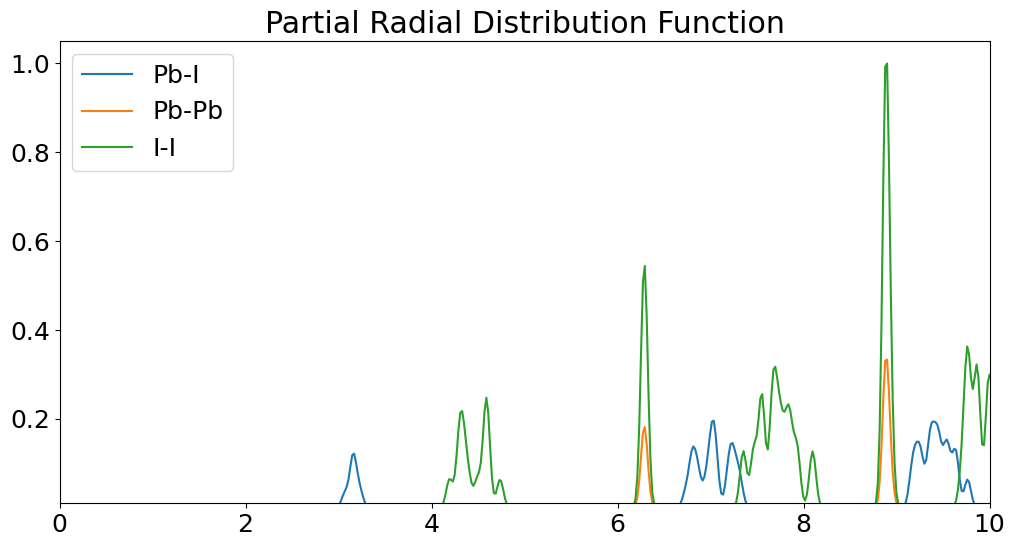

In [4]:
perov = Perovskite("../tests/data/mapbi3.cif", B = "Pb", X = "I")

# The default 
perov.plot_rdf()

Alternatively we can access the ASE implementation with:

*Note here, we see Pb-I distances at around ~4 Angstrom, inspect the .cif file if desired to see that these are not really present. Hence our implementation is preferred.*

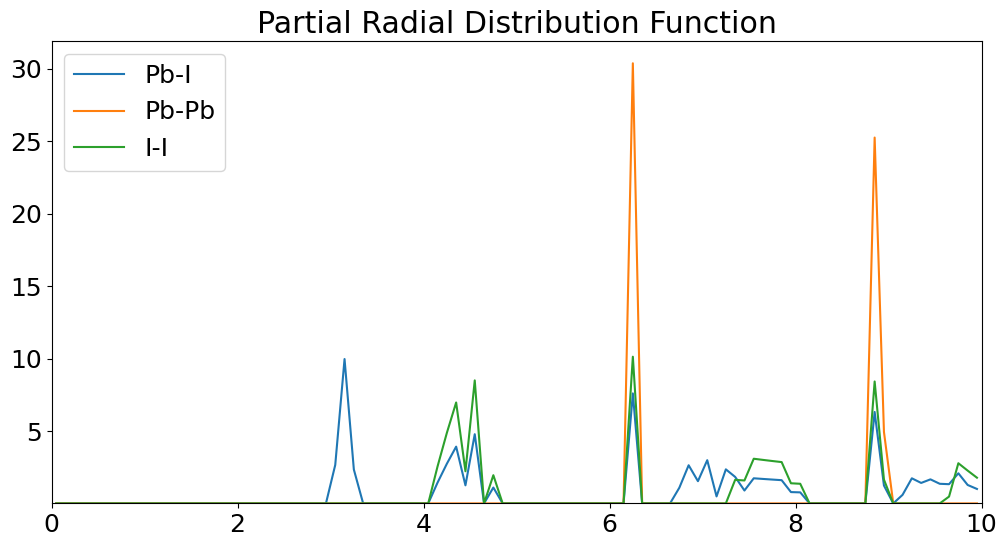

In [5]:
perov.plot_rdf(mode='ase')

**A note on max_distance**
max_distance can be chosen to be any value, unlike the pure ASE implementation. However what happens is a supercell is constructed from your perovskite such that max_distance\*2 is **less** than the cell parameter along any given direction (i.e. a sphere of radius max_distance fits inside one 'unit cell'). A consequence of this can be artifically high periodicity in the rdf, as well as increased computation time. Keep this in mind, and set max_distance accordingly for whatever it is you're trying to do.

Here we show an example of periodicity that is likely artifically high compared with a real sample when setting max_distance to 20 angstrom.

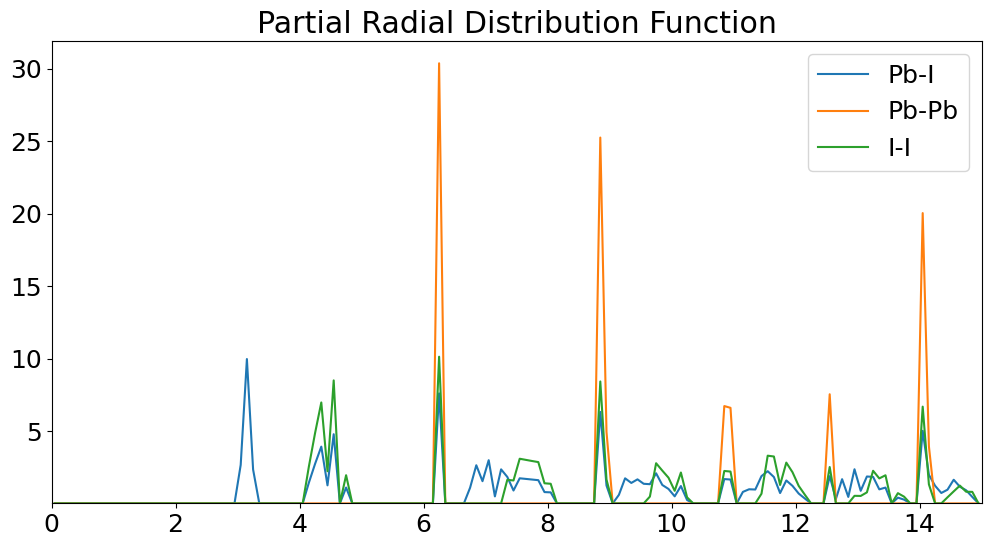

In [6]:
perov.plot_rdf(max_dist = 15, mode='ase')

### 2. B-X/Bp-X Bond distance distributions

To look at the bond distribution simple use the Perovskite.plot_distances() function.

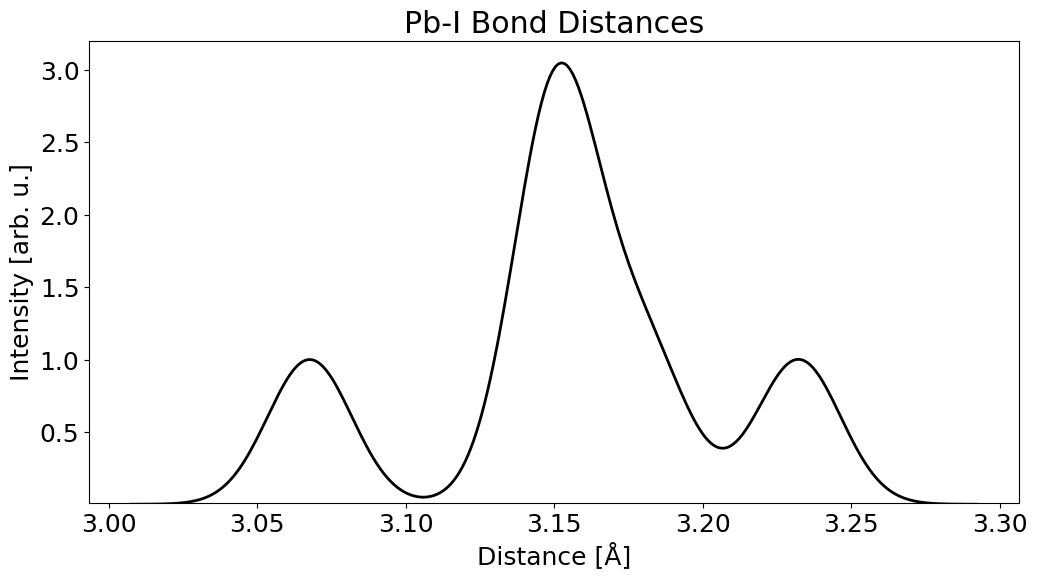

In [7]:
perov.plot_distances()

We can adjust how smeared the specta is with the ```smearing``` term, and additionally, we can increase the grid resolution with ```gridpoints```, if you don't like the defaults for your system.

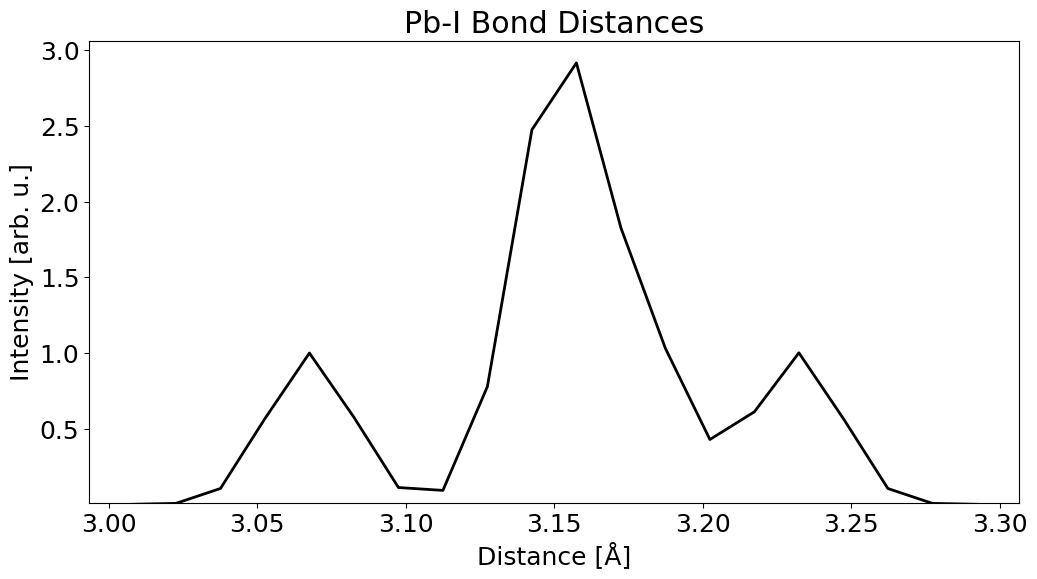

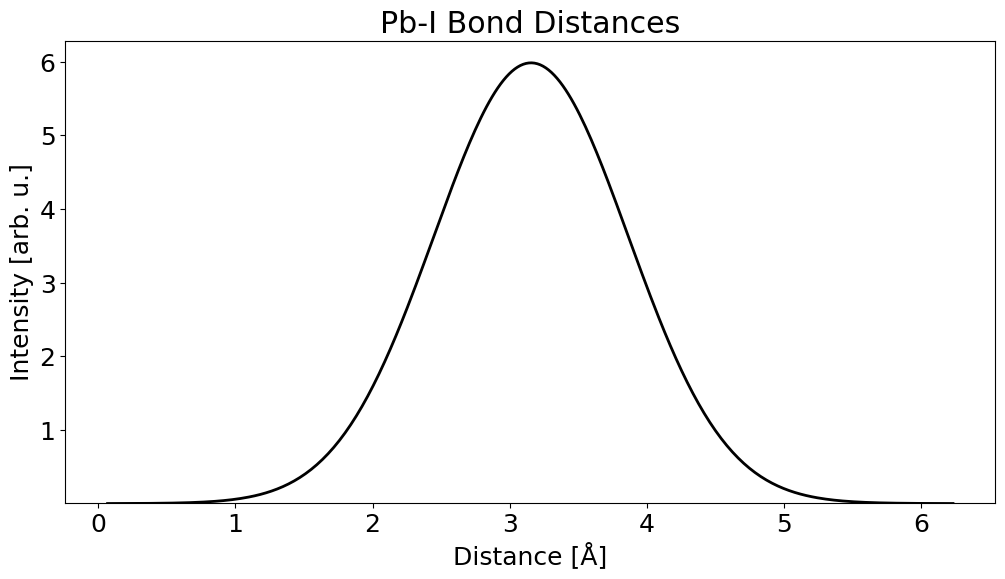

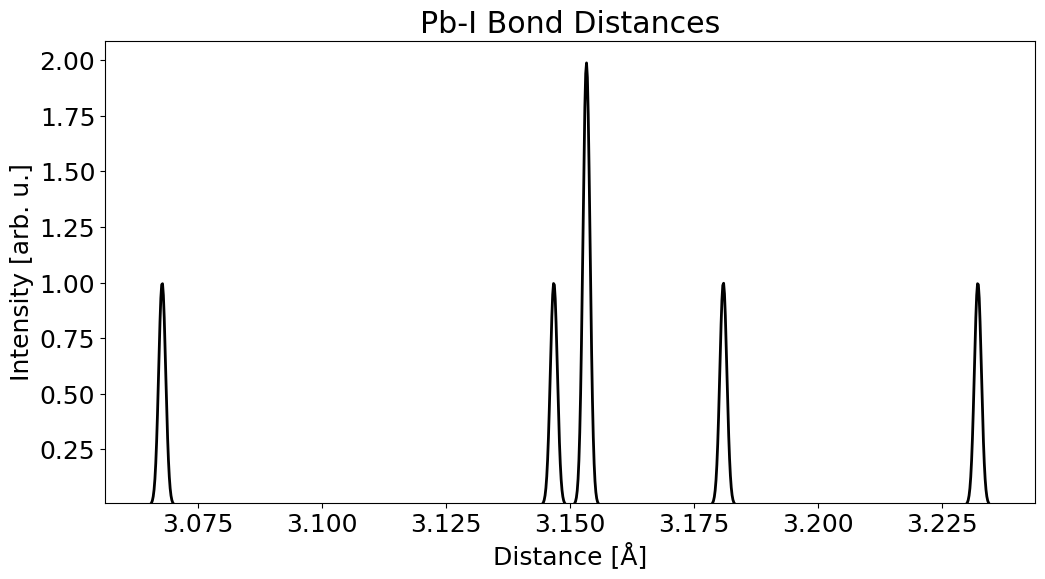

In [8]:
perov.plot_distances(gridpoints = 20)
perov.plot_distances(smearing=1)
perov.plot_distances(smearing = 1e-3, gridpoints = 1000)

### Important
You can pass ```fignum``` and ```show=False``` to the plotting functions in order to have more fine-grained control over the axes/titles. E.g. maybe you want to change the title to include some perovskite specific information, save the figure.

In this scenario, you should think of the your code as a simple wrapper to the plot functions where yu change the figure size, add subplots, change fonts, etc.

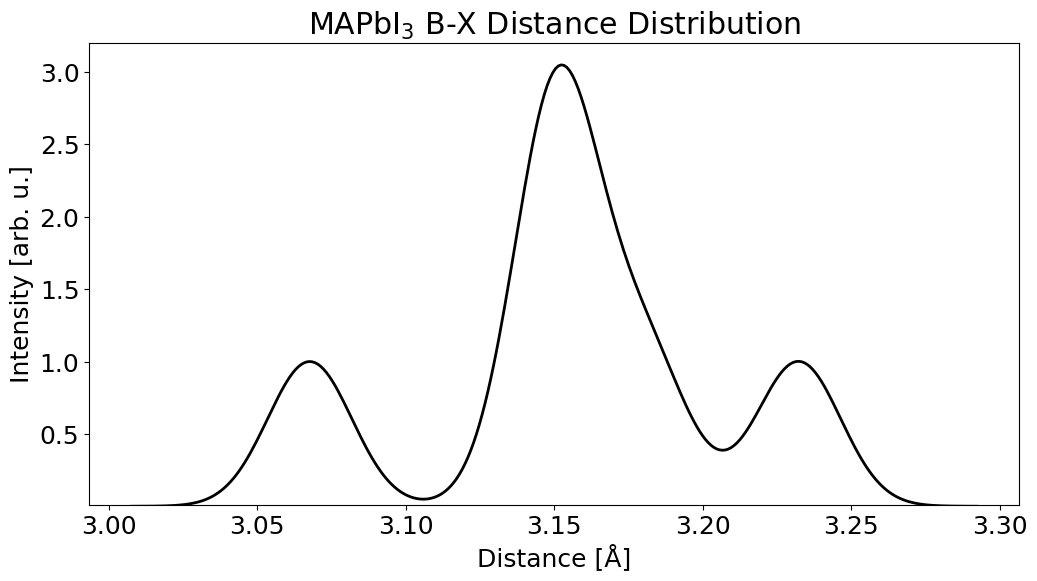

In [9]:
import matplotlib.pyplot as plt
plt.figure(230, figsize = (12,6))
perov.plot_distances(fignum=230, show = False)
plt.title("MAPbI$_3$ B-X Distance Distribution")
plt.show()

3. B-X-B/X-B-X bond angle distributions

To look at the bond angle distributions, simply use the ```Perovskite.plot_angles()``` function

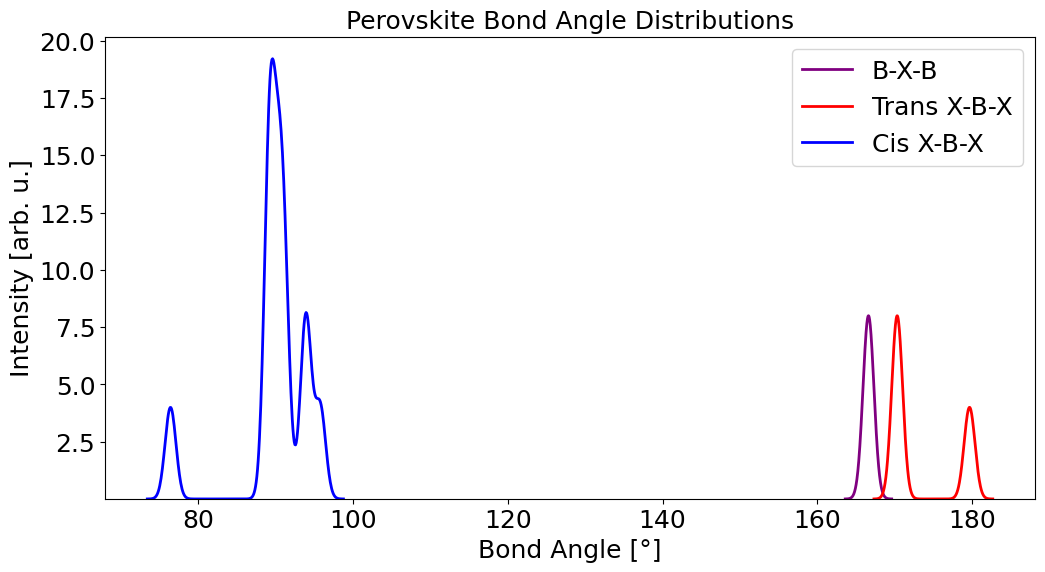

In [11]:
perov = Perovskite("../tests/data/test_perovskite_1.cif", B = "Pb", X = "I")
perov.plot_angles()

### A few words of note for this function.

1. X-B-X angles are determined in a very robust way, as they are needed for the computation of the $\Sigma$ parameter and are computed from the Perovskite.octahedra. Every X-B-X angle is guaranteed to be counted once and only once per octahedra, including X-B-X angles which go through a cell boundary.

2. B-X-B angles are computed through the ASE functionality, and are thereby bounded by the covalent radii of the B, X atoms. With this being the case, one may desire to tune the cutoffs associated with those covalent radii, and this can be done through the ```bxb_scale``` parameter. In the future, there will be an option to calculate X-B-X bond angles the ASE for consistency's sake.

3. Bond angles are computed only on a grid surrounding the supported region of the distribution. This allows for finer grid resolution when applying the smearing at a lower cost (look closely at the x-axis in the above plot to see what is meant by this).


## Below is an example of how you might want to adjust the ```bxb_scale``` in order to detect B-X-B bond angles which are not being picked up due to bad cutoffs.

Here we artifically lower the covalent radii, by setting ```bxb_scale``` to .8, and find that at about ~.95 the B-X distances are short enough for ase to detect connectivity there.

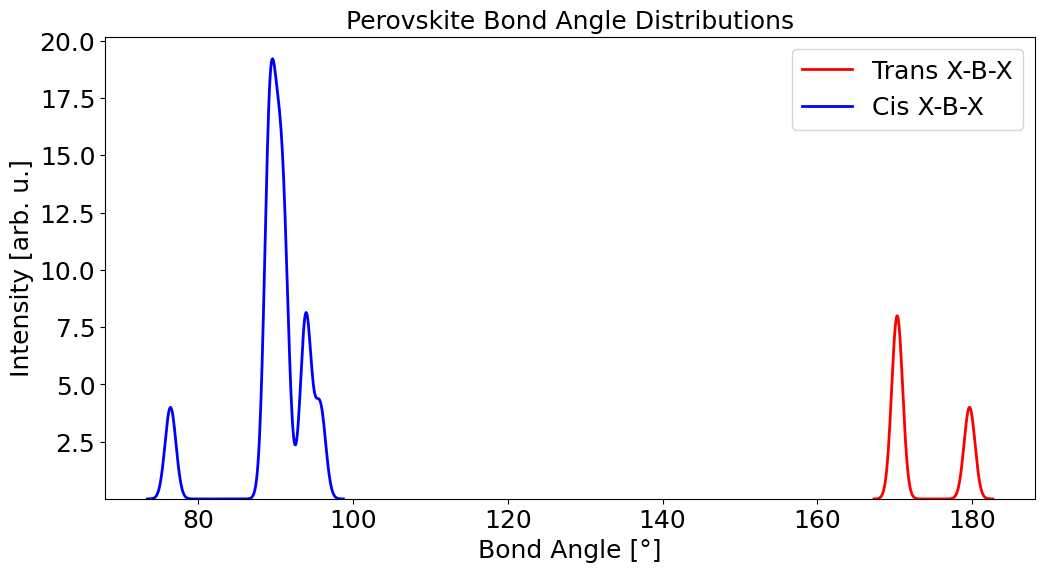

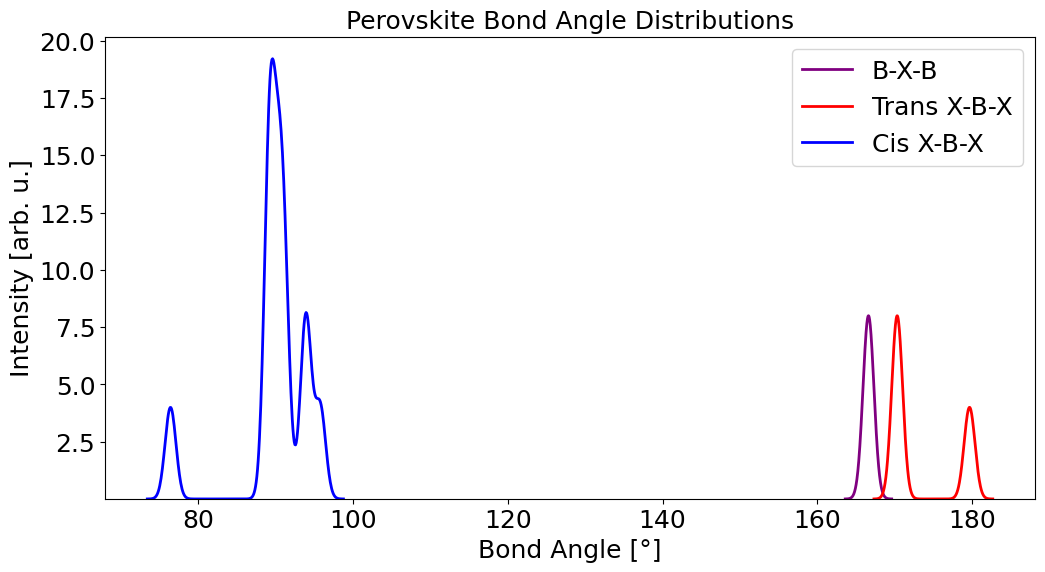

In [12]:
perov.plot_angles(bxb_scale = .8)
perov.plot_angles(bxb_scale = .95)

Additionally for sufficiently small perovskites, e.g. conventional cells of ABX3 perovskites, one may need a supercell for the ASE connectivity to pick up the correct BXB angles. This can be achieved by setting the ```supercell``` keyword to e.g. ```(2,2,2)```, and if desired the ```debug``` keyword to ```True``` to get information about how many B-X-B bond angles were detected.

Let's use the builder module to demonstrate these two things.

In [13]:
from pyrovskite.builder import make_bulk
help(make_bulk)

Help on function make_bulk in module pyrovskite.builder:

make_bulk(A, B, X, BX_dist)
    Makes a bulk perovskite structure.
    
    Parameters
    ----------
    A : str/Atoms
        The A cation. If str, the atomic symbol of the A cation. If Atoms, the
        Atoms object of the A cation.
    B : str
        The atomic symbol of the B cation.
    X : str
        The atomic symbol of the X anion.
    BX_dist : float
        The desired BX bond distance (in Angstrom)
    
    Returns
    -------
    perov : Atoms
        The bulk perovskite structure as an ASE Atoms object.




There are 0 Pb-I-Pb bond angles



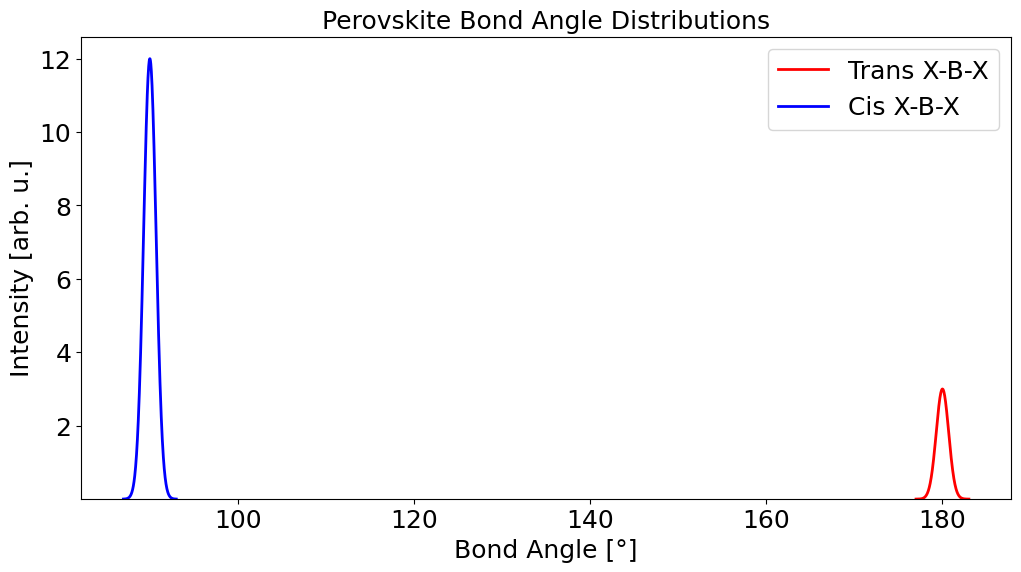

In [15]:
perov = Perovskite(make_bulk("Cs", "Pb", "I", 3.1), B = "Pb", X = "I")
perov.plot_angles(debug = True)

Note above the missing B-X-B angles in the plot, upon creating a supercell, this issue will be resolved:

Also of note, in the case that the supercell is used, the smoothed distribution is scaled inversly by the product of the supercell dimensions (e.g. by 1/8 for a (2,2,2) supercell as below).


There are 24 Pb-I-Pb bond angles



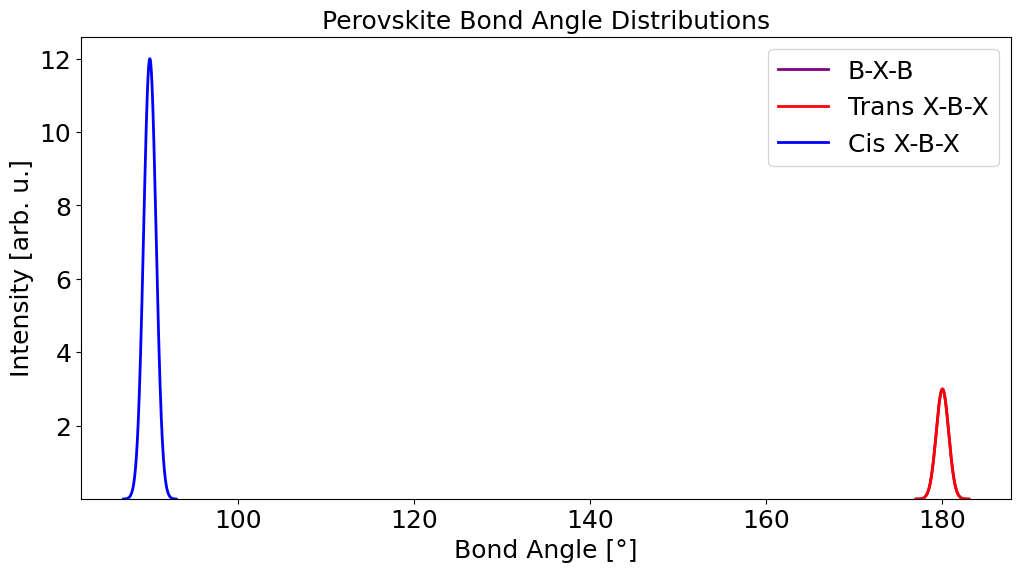

In [16]:
perov.plot_angles(supercell = (2,2,2), debug = True)

Naturally, these are centered perfectly on 90/180 degrees, as we've just made a pristine perovskite with the pyrovskite builder module.

#### This concludes the usage of the plotting functions for bond angles, bond distances and radial distribution functions. 

## For additional information see the other notebooks:

#### The_Perovskite_class.ipynb
- Basic usage of the Perovskite class
- Overview of the internals of the codebase
- Computation of the basic distorion parameters

#### The_builder_module.ipynb
- How to create bulk, 2d, double, 2d-double perovskites of numerous phases.

#### The_Lambda_parameters.ipynb
- Descritption/derivation of the Lambda descriptors as described in (add DOI)
- How to compute the Lambda descriptor using the code.